# Test Lidar 2

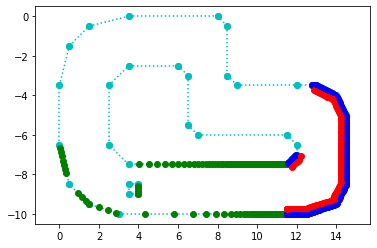

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from zonesafe import *
from adaptevitesserelat import *
from trouvecible import *
from environment import *
from lidar import *

#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c:o")
        j+=1
    i+=1
    
i=0
position=[11.5,-9.5]
orientation=0
N=360
rv=0.2
m=0.05
alphainc=360/N

M=lidar(envir,position,orientation,N)
MMMR=zonesafe(M,rv,m)
x=position[0]    
y=position[1]

while i<len(M):
    r=M[i][1]
    xl=r*cos((M[i][0]*alphainc+orientation)*2*pi/360)+x
    yl=r*sin((M[i][0]*alphainc+orientation)*2*pi/360)+y
    plt.plot(xl, yl,"g:o")
    i+=1
i=0
#callage de MMMR dans notre repère avec position et orientation
while i<len(MMMR):
    xl=MMMR[i][2] #abscisse du pt lidar dans le ref du lidar 
    yl=MMMR[i][3]
    theta=MMMR[i][0] #nb inc angle de coord polaires dans le ref du lidar
    thetac=(theta*alphainc+orientation)*2*pi/360  #angle de coord polaires dans le ref absolu
    r=MMMR[i][1]
    xlc=r*cos(thetac)+x #rcos(thetac) =abscisse dans le ref du lidar rotationné de orientation xlc=abscisse dans le ref absolu
    ylc=r*sin(thetac)+y

    xlp=MMMR[i][4] #abscisse du pt lidar dans le ref du lidar 
    ylp=MMMR[i][5]
    thetap=atan((ylp)/(xlp))
    if xlp<0:
        thetap=pi+atan(ylp/xlp)
    thetacp=thetap+orientation*2*pi/360
    rp=sqrt(xlp**2+ylp**2)
    xlpc=rp*cos(thetacp)+x
    ylpc=rp*sin(thetacp)+y


    plt.plot(xlc, ylc,"b:o")
    plt.plot(xlpc,ylpc,"r:o")
    i+=1
plt.axis('equal')   
plt.show()

#lidar testé avec succès après 6h de débugage


# Simulation de la trajetoire 2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

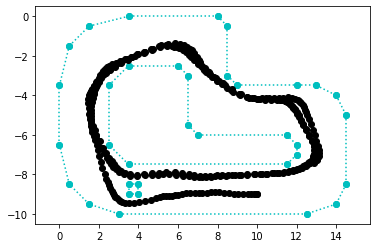

In [2]:
#simulation de trajectoire:

import matplotlib.pyplot as plt
import numpy as np
import copy
from zonesafe import *
from adaptevitesserelat import *
from trouvecible import *
from environment import *
from lidar import *
from actualise import *
from actualise2 import *
from params import *
from calculrayoncourbure import *
from math import *
from objectif import *

trajectoirex=[]
trajectoirey=[]
trajectoireor=[]

#initialisation

envir=environment()
[positioninit, p2, orientationinit, o2, vinit, vi2, deltat,amaxlat,epsilonmax,amax,amin,tsb,l,larg,vmax,N,rv,m,alpha,lanti]=params()
alphainc=360/N
position=positioninit
orientation=orientationinit

v=vinit
positionm1=positioninit
orientationm1=orientationinit
vm1=vinit

Mm1=lidar(envir,positionm1,orientationm1,N)
M=lidar(envir,position,orientation,N)

MMMR=zonesafe(M,rv,m)

MMMRC=adaptevitesserelat (Mm1,M,MMMR,alpha,v,deltat,lanti,orientation,orientationm1)
cible=trouvecible(MMMRC)
obj=objectif(cible,v,deltat)
R=calculrayoncourbure(obj)


#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c:o")
        j+=1
    i+=1
    
i=0

plt.plot(position[0],position[1],"k:o")

P=375  #nombre de pts de la traj à tracer
j=0
while j<P:
    
    
    trajectoirex.append(position[0]-cos(orientation*2*pi/360))
    trajectoirey.append(position[1]-sin(orientation*2*pi/360))
    trajectoireor.append(orientation)
    
    #mise à jour des variables 
    positionm1=copy.deepcopy(position)
    orientationm1=copy.deepcopy(orientation)
    vm1=copy.deepcopy(v)
    
    [position,orientation,v]=actualise2(R,v,position,obj,cible,orientation,deltat,amaxlat,epsilonmax,amax,amin,tsb,l,vmax,N)
    Mm1=lidar(envir,positionm1,orientationm1,N)
    M=lidar(envir,position,orientation,N)
    MMMR=zonesafe(M,rv,m)
    MMMRC=adaptevitesserelat (Mm1,M,MMMR,alpha,v,deltat,lanti,orientation,orientationm1)
    cible=trouvecible(MMMRC)
    obj=objectif(cible,v,deltat)
    R=calculrayoncourbure(obj)
    
    #préparation de cible pour affichage 
    xcible=cible[0]  
    ycible=cible[1]
    thetacible=atan((ycible)/(xcible))
    if xcible<0:
        thetacible=pi+atan(ycible/xcible)
    thetaciblec=thetacible+orientation*2*pi/360
    rcible=sqrt(xcible**2+ycible**2)
    xciblec=rcible*cos(thetaciblec)+position[0]
    yciblec=rcible*sin(thetaciblec)+position[1]

    
    
    
    #debugage
   
    print(j)
    #print('vitesse',v)
    #print('orientation', orientation)
    #print('R',R)
    
     
     
    
    plt.plot(position[0],position[1],"k:o")
    #plt.plot(xciblec,yciblec,"g:o")
    j+=1
    
plt.axis('equal')
plt.show()

# Animation Test 2019

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
evitement ok
15
16
17
18
19
evitement ok
20
21
22
23
evitement ok
24
25
26
27
28
29
30
31
32
33
34
35
evitement ok
36
evitement ok
37
38
39
40
41
42
evitement ok
43
evitement ok
44
45
46
47
48
49
50
51
52
53
54
55
56
57
evitement ok
58
evitement ok
59


<ipython-input-5-d4ca768d5925>:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
MovieWriter stderr:
[NULL @ 00000284fbeca140] Unable to find a suitable output format for 'predictifvsPID.html'
predictifvsPID.html: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'predictifvsPID.html']' returned non-zero exit status 1.

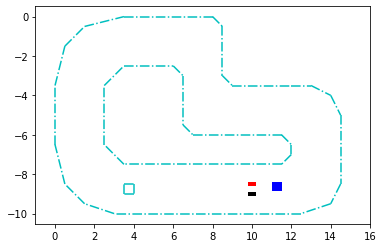

In [5]:
from trajectoire import *
from trajectoirearc import *


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation

P=60 #P=110 # 1 tour =?
[traj1,traj2]=trajectoirearc(P)

x1=traj1[0]
y1=traj1[1]
yaw1=traj1[2]
cb1=traj1[3]

x2=traj2[0]
y2=traj2[1]
yaw2=traj2[2]
cb2=traj2[3]

obst=[]

[positioninit1,positioninit2,orientationinit1,orientationinit2,vinit1,vinit2,deltat,amaxlat,epsilonmax,amax,amin,tsb,l,larg,vmax,N,rv,m,alpha,lanti]=params()
alpha=pi+atan(larg/l)


i=0
while i<len(x1):
    x1[i]=x1[i]+rv*(cos(yaw1[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y1[i]=y1[i]+rv*(sin(yaw1[i]*2*pi/360+alpha))
    x2[i]=x2[i]+rv*(cos(yaw2[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y2[i]=y2[i]+rv*(sin(yaw2[i]*2*pi/360+alpha))
    obst.append(-9+1*sin(i*2*pi*0.2*deltat/1))
    i+=1

fig = plt.figure()
plt.axis('equal')

#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c-.")
        j+=1
    i+=1

ax = fig.add_subplot(111)
ax.set_xlim(-1,16)
ax.set_ylim(-11,1)

patch1 = patches.Rectangle((0, 0), 0, 0, fc='k')
patch2 = patches.Rectangle((0, 0), 0, 0, fc='r')
obstacle = patches.Rectangle((0, 0), 0, 0, fc='b')
point1, = ax.plot([], [],'ko')
point2, = ax.plot([], [],'ro')

def init():
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(obstacle)
    point1.set_data([], [])
    point2.set_data([], [])

    return (patch1,patch2,point1,point2)

def animate(i):
    patch1.set_width(0.4)
    patch1.set_height(0.2)
    patch1.set_xy([x1[i], y1[i]])
    patch1.angle = yaw1[i]
    patch2.set_width(0.4)
    patch2.set_height(0.2)
    patch2.set_xy([x2[i], y2[i]])
    patch2.angle = yaw2[i]
    obstacle.set_width(0.5)
    obstacle.set_height(0.5)
    obstacle.set_xy([11,obst[i]])
    obstacle.angle = 0
    point1.set_data(cb1[i][0], cb1[i][1])
    point2.set_data(cb2[i][0], cb2[i][1])
    return (patch1,patch2,obstacle,point1,point2)

anim = animation.FuncAnimation(fig, animate,
                               init_func=init, 
                               frames=len(x1),
                               interval=100,
                               blit=True)

anim.save('predictifvsPID.html', writer='ffmpeg', fps=10)
plt.show()

# AnimationTestArc

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
evitement ok
15
16
17
18
19
evitement ok
20
21
22
23
evitement ok
24
25
26
27
28
29
30
31
32
33
34
35
evitement ok
36
evitement ok
37
38
39
40
41
42
evitement ok
43
evitement ok
44
45
46
47
48
49
50
51
52
53
54
55
56
57
evitement ok
58
evitement ok
59


<Figure size 432x288 with 0 Axes>

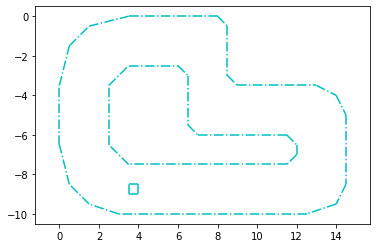

In [16]:
from trajectoirearc import *


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from IPython import display

P=60 #P=500 #1 tour =?
[traj1,traj2]=trajectoirearc(P)

x1=traj1[0]
y1=traj1[1]
yaw1=traj1[2]

x2=traj2[0]
y2=traj2[1]
yaw2=traj2[2]

[positioninit1,positioninit2,orientationinit1,orientationinit2,vinit1,vinit2,deltat,amaxlat,epsilonmax,amax,amin,tsb,l,larg,vmax,N,rv,m,alpha,lanti]=params()
alpha=pi+atan(larg/l)


i=0
while i<len(x1):
    x1[i]=x1[i]+rv*(cos(yaw1[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y1[i]=y1[i]+rv*(sin(yaw1[i]*2*pi/360+alpha))
    x2[i]=x2[i]+rv*(cos(yaw2[i]*2*pi/360+alpha)) #coordonnées du coin inférieur gauche
    y2[i]=y2[i]+rv*(sin(yaw2[i]*2*pi/360+alpha))
    i+=1

fig = plt.figure()
plt.show()
plt.axis('equal')

#afficher le circuit

envir=environment()
n=len(envir)
i=0
while i<n:
    nn=len(envir[i])
    j=0
    while j<(nn-1):
        plt.plot([envir[i][j][0],envir[i][j+1][0]],[envir[i][j][1],envir[i][j+1][1]],"c-.")
        j+=1
    i+=1

ax = fig.add_subplot(111)
ax.set_xlim(-1,18)
ax.set_ylim(-11,1)

patch1 = patches.Rectangle((0, 0), 0, 0, fc='k')
patch2 = patches.Rectangle((0, 0), 0, 0, fc='r')


def init():
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    return (patch1,patch2)

def animate(i):
    patch1.set_width(0.4)
    patch1.set_height(0.2)
    patch1.set_xy([x1[i], y1[i]])
    patch1.angle = yaw1[i]
    patch2.set_width(0.4)
    patch2.set_height(0.2)
    patch2.set_xy([x2[i], y2[i]])
    patch2.angle = yaw2[i]
    return (patch1,patch2)

#anim = animation.FuncAnimation(fig, animate,
 #                              frames=len(x1),
 #                              init_func=init,
 #                              interval=100,
 #                              blit=True)
#video = anim.to_html5_video()
#html = display.HTML(video)
#display.display(html)
#anim.save('tours.html', writer='ffmpeg', fps=10)
#plt.show()